In [ ]:
import cv2
import numpy as np
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import zipfile
from google.colab import drive
import io

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the Flickr8K dataset in Google Drive
dataset_path = '/content/drive/MyDrive/Flickr8k'

# Set the path to save the preprocessed data
save_path = '/content/drive/MyDrive/Flickr8k/preprocessed_data'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
# Read the captions file into a Pandas DataFrame
captions_path = os.path.join(dataset_path, 'captions.txt')
df = pd.read_csv(captions_path, sep=',', header=None, names=['image', 'caption'])

df.head()

,image,caption
0,image,caption
1,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
2,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
3,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
4,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...


In [ ]:
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove links
    text = re.sub(r'http\S+', '', text)
    # Remove next lines
    text = text.replace('\n', ' ')
    # Remove words containing numbers
    text = re.sub(r'\b\d+\b', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])
    return text

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Preprocess the text and save the results
text_path = os.path.join(dataset_path, 'captions.txt')
df['caption'] = df['caption'].apply(preprocess_text)

# Show original text
print("Original Text:\n", df['caption'].head().tolist())

# Show preprocessed text
print("\nPreprocessed Text:\n", df['caption'].head().tolist())

new_text_path = os.path.join(save_path, 'preprocessed_data', 'new_captions.txt')
if not os.path.exists(os.path.join(save_path, 'preprocessed_data')):
    os.makedirs(os.path.join(save_path, 'preprocessed_data'))
df.to_csv(new_text_path, index=False)

Original Text:
 ['caption', 'child pink dress climbing set stair entry way', 'girl going wooden building', 'little girl climbing wooden playhouse', 'little girl climbing stair playhouse']

Preprocessed Text:
 ['caption', 'child pink dress climbing set stair entry way', 'girl going wooden building', 'little girl climbing wooden playhouse', 'little girl climbing stair playhouse']


In [ ]:
# Function to perform image preprocessing
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Denoising
    denoised_image = cv2.fastNlMeansDenoising(gray_image, None, 10, 7, 21)
    # Resizing to a fixed size
    resized_image = cv2.resize(denoised_image, (224, 224))
    # Normalizing the pixel values to [0, 1]
    normalized_image = resized_image / 255.0
    return normalized_image

In [ ]:
# Function to preprocess all images and save them
def preprocess_all_images(dataset_path, save_path):
    for file in os.listdir(os.path.join(dataset_path, 'Images')):
        if file.endswith('.jpg'):
            image_path = os.path.join(dataset_path, 'Images', file)
            preprocessed_image_path = os.path.join(save_path, 'preprocessed_data', file)
            preprocessed_image = preprocess_image(image_path)
            # Save preprocessed image
            cv2.imwrite(preprocessed_image_path, (preprocessed_image * 255).astype(np.uint8))


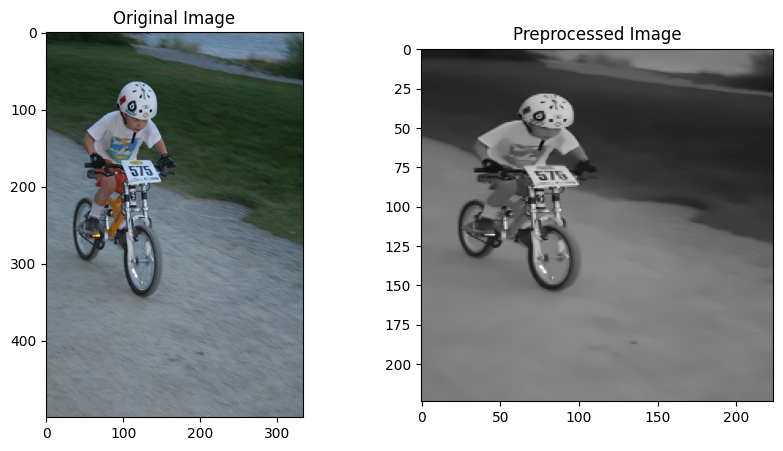

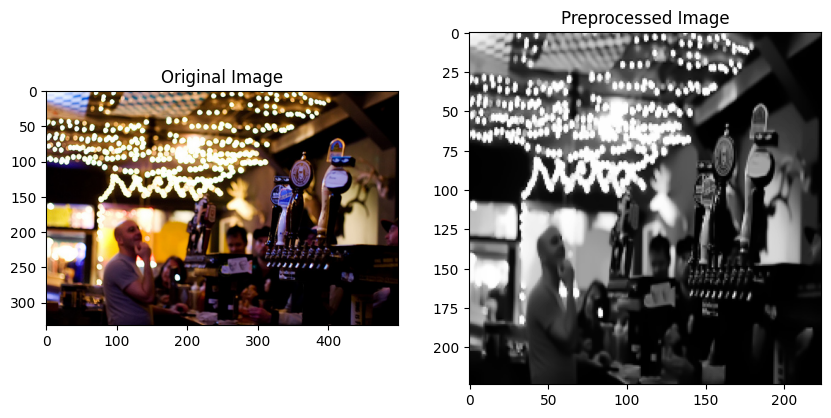

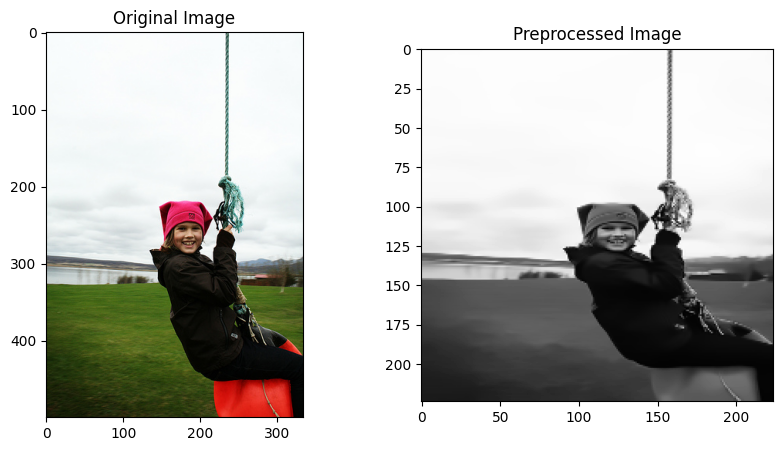

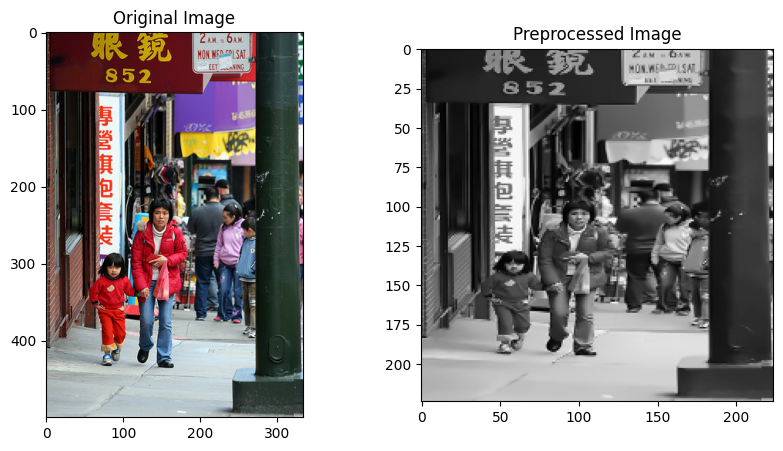

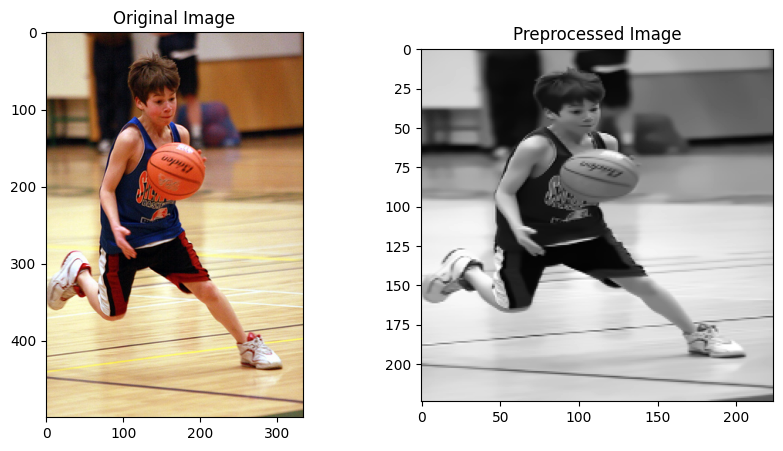

In [ ]:
import random
import matplotlib.pyplot as plt
# Display the first 5 random images before and after preprocessing
def display_images(dataset_path, save_path, num_images=5):
    image_files = [file for file in os.listdir(os.path.join(dataset_path, 'Images')) if file.endswith('.jpg')]
    random_images = random.sample(image_files, num_images)
    for file in random_images:
        image_path = os.path.join(dataset_path, 'Images', file)
        preprocessed_image_path = os.path.join(save_path, 'preprocessed_data', file)

        # Original Image
        original_image = cv2.imread(image_path)

        # Preprocessed Image
        preprocessed_image = preprocess_image(image_path)

        # Display side by side
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(preprocessed_image, cmap='gray')
        plt.title('Preprocessed Image')
        plt.show()

# Create the preprocessed_data directory if it doesn't exist
if not os.path.exists(os.path.join(save_path, 'preprocessed_data')):
    os.makedirs(os.path.join(save_path, 'preprocessed_data'))

# Preprocess and save all images
preprocess_all_images(dataset_path, save_path)

# Display and preprocess images
display_images(dataset_path, save_path, num_images=5)